In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("/Users/kartikamusle/Downloads/AI_tutor_outcome_filled_updated.xlsx")
df.head()

,Reference_id,Name,Selected_topic,Quiz_marks,Explanation,Gender,Age,Final_Quiz_marks,Profession,Dashboard_Flow,Engagement_Level,Interactions_Count,Time_Spent_Learning,Quiz_Improvement_Score,Topic_Difficulty
0,KUN84012,Kunal,Functions,2,need improvement,male,20,7,finance employee,positive,High,5,127,5,0
1,KAB81567,Kabir,File operations,3,good,male,24,2,student,negative,Medium,4,115,-1,2
2,JAY24384,Jaya,conditional Statement,1,fair,female,23,7,IT employee,positive,Medium,5,85,6,1
3,SAR84305,Sara,OOPs,4,need improvement,female,26,8,IT employee,neutral,High,3,161,4,0
4,SAR77949,Sara,Functions,2,excellent,female,23,10,IT employee,negative,High,1,132,8,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Reference_id            1200 non-null   object
 1   Name                    1200 non-null   object
 2   Selected_topic          1200 non-null   object
 3   Quiz_marks              1200 non-null   int64 
 4   Explanation             1200 non-null   object
 5   Gender                  1200 non-null   object
 6   Age                     1200 non-null   int64 
 7   Final_Quiz_marks        1200 non-null   int64 
 8   Profession              1200 non-null   object
 9   Dashboard_Flow          1200 non-null   object
 10  Engagement_Level        1200 non-null   object
 11  Interactions_Count      1200 non-null   int64 
 12  Time_Spent_Learning     1200 non-null   int64 
 13  Quiz_Improvement_Score  1200 non-null   int64 
 14  Topic_Difficulty        1200 non-null   int64 
dtypes: i

In [4]:
df.describe()

,Quiz_marks,Age,Final_Quiz_marks,Interactions_Count,Time_Spent_Learning,Quiz_Improvement_Score,Topic_Difficulty
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,2.983333,22.512500,5.487500,3.045833,90.970000,2.504167,1.525833
std,1.412345,2.896867,2.896003,1.420239,44.854681,3.221329,1.112968
min,1.000000,18.000000,1.000000,1.000000,10.000000,-4.000000,0.000000
25%,2.000000,20.000000,3.000000,2.000000,54.000000,0.000000,1.000000
50%,3.000000,22.000000,5.000000,3.000000,94.000000,2.000000,2.000000
75%,4.000000,25.000000,8.000000,4.000000,120.000000,5.000000,3.000000
max,5.000000,27.000000,10.000000,5.000000,180.000000,9.000000,3.000000


In [5]:
df.isna().sum()

Reference_id              0
Name                      0
Selected_topic            0
Quiz_marks                0
Explanation               0
Gender                    0
Age                       0
Final_Quiz_marks          0
Profession                0
Dashboard_Flow            0
Engagement_Level          0
Interactions_Count        0
Time_Spent_Learning       0
Quiz_Improvement_Score    0
Topic_Difficulty          0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
print(df['Engagement_Level'].unique())

['High' 'Medium' 'Low']


In [8]:
from sklearn.preprocessing import LabelEncoder

# 1. Clean and encode 'Engagement_Level'
df['Engagement_Level'] = df['Engagement_Level'].astype(str).str.strip().str.lower()

# Only keep rows with valid values
valid_levels = {'low': 0, 'medium': 1, 'high': 2}
df = df[df['Engagement_Level'].isin(valid_levels.keys())]

df['Engagement_Level'] = df['Engagement_Level'].map(valid_levels)

# 2. Create Improvement_Numeric
df['Improvement_Numeric'] = df['Final_Quiz_marks'] - df['Quiz_marks']

# 3. Encode Dashboard_Flow
df['Dashboard_Flow'] = df['Dashboard_Flow'].astype(str).str.strip().str.lower()
df['Dashboard_Score'] = df['Dashboard_Flow'].map({
    'negative': 0,
    'neutral': 1,
    'positive': 2
})

# 4. Label encode Profession
df['Profession'] = df['Profession'].astype(str).str.strip()
df['Profession_Code'] = LabelEncoder().fit_transform(df['Profession'])

# 5. Confirm everything is encoded
print(df[['Engagement_Level', 'Improvement_Numeric', 'Dashboard_Score', 'Profession_Code']].head())


   Engagement_Level  Improvement_Numeric  Dashboard_Score  Profession_Code
0                 2                    5                2                1
1                 1                   -1                0                4
2                 1                    6                2                0
3                 2                    4                1                0
4                 2                    8                0                0


In [9]:
features = [
    'Quiz_marks', 'Final_Quiz_marks', 'Interactions_Count',
    'Time_Spent_Learning', 'Topic_Difficulty', 'Improvement_Numeric',
    'Dashboard_Score', 'Profession_Code'
]
x = df[features]
y = df['Engagement_Level']

In [10]:
x

,Quiz_marks,Final_Quiz_marks,Interactions_Count,Time_Spent_Learning,Topic_Difficulty,Improvement_Numeric,Dashboard_Score,Profession_Code
0,2,7,5,127,0,5,2,1
1,3,2,4,115,2,-1,0,4
2,1,7,5,85,1,6,2,0
3,4,8,3,161,0,4,1,0
4,2,10,1,132,3,8,0,0
...,...,...,...,...,...,...,...,...
1195,5,4,3,110,0,-1,0,2
1196,5,10,4,95,3,5,1,1
1197,2,1,4,106,3,-1,1,1
1198,5,8,2,100,2,3,2,1


In [11]:
print(df['Engagement_Level'].isna().sum())

0


In [12]:
y

0       2
1       1
2       1
3       2
4       2
       ..
1195    1
1196    1
1197    1
1198    1
1199    0
Name: Engagement_Level, Length: 1200, dtype: int64

In [13]:
print(df['Engagement_Level'].value_counts())

Engagement_Level
1    437
2    408
0    355
Name: count, dtype: int64


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [23]:
x.shape

(1200, 8)

In [24]:
y.shape

(1200,)

## Standard Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit only on training data
x_train_scaled = scaler.fit_transform(x_train)

# Transform test data using same scaler
x_test_scaled = scaler.transform(x_test)


## Logistic Regression Accuracy 91%

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model_lr = LogisticRegression(max_iter = 1000)
model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9083333333333333
Confusion Matrix:
 [[72  2  0]
 [ 0 76  8]
 [ 0 12 70]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        74
           1       0.84      0.90      0.87        84
           2       0.90      0.85      0.88        82

    accuracy                           0.91       240
   macro avg       0.91      0.91      0.91       240
weighted avg       0.91      0.91      0.91       240



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Decision Tree Accuracy 91%

In [27]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)
y_pred_dt = model_dt.predict(x_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9083333333333333
Confusion Matrix:
 [[72  2  0]
 [ 0 75  9]
 [ 0 11 71]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        74
           1       0.85      0.89      0.87        84
           2       0.89      0.87      0.88        82

    accuracy                           0.91       240
   macro avg       0.91      0.91      0.91       240
weighted avg       0.91      0.91      0.91       240



## Random Forest Accuracy 93%

In [28]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9291666666666667
Confusion Matrix:
 [[74  0  0]
 [ 0 76  8]
 [ 0  9 73]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       0.89      0.90      0.90        84
           2       0.90      0.89      0.90        82

    accuracy                           0.93       240
   macro avg       0.93      0.93      0.93       240
weighted avg       0.93      0.93      0.93       240



## K-Nearest Neighbors Accuracy 90%

In [29]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(x_train, y_train)
y_pred_knn = model_knn.predict(x_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.9041666666666667
Confusion Matrix:
 [[72  2  0]
 [ 0 74 10]
 [ 0 11 71]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        74
           1       0.85      0.88      0.87        84
           2       0.88      0.87      0.87        82

    accuracy                           0.90       240
   macro avg       0.91      0.91      0.91       240
weighted avg       0.91      0.90      0.90       240



## Support Vector Machine Accuracy 92%

In [30]:
from sklearn.svm import SVC

model_svm = SVC(probability=True)
model_svm.fit(x_train, y_train)
y_pred_svm = model_svm.predict(x_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9166666666666666
Confusion Matrix:
 [[74  0  0]
 [ 0 79  5]
 [ 0 15 67]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       0.84      0.94      0.89        84
           2       0.93      0.82      0.87        82

    accuracy                           0.92       240
   macro avg       0.92      0.92      0.92       240
weighted avg       0.92      0.92      0.92       240



## XGBoost Accuracy 93%

In [34]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model_xgb.fit(x_train, y_train)
y_pred_xgb = model_xgb.predict(x_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
XGBoost Accuracy: 0.925
Confusion Matrix:
 [[73  1  0]
 [ 0 78  6]
 [ 0 11 71]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        74
           1       0.87      0.93      0.90        84
           2       0.92      0.87      0.89        82

    accuracy                           0.93       240
   macro avg       0.93      0.93      0.93       240
weighted avg       0.93      0.93      0.93       240



/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:18:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## Gradient Boosting Accuracy 94%

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier()
model_gb.fit(x_train, y_train)
y_pred_gb = model_gb.predict(x_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.9375
Confusion Matrix:
 [[73  1  0]
 [ 0 78  6]
 [ 0  8 74]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        74
           1       0.90      0.93      0.91        84
           2       0.93      0.90      0.91        82

    accuracy                           0.94       240
   macro avg       0.94      0.94      0.94       240
weighted avg       0.94      0.94      0.94       240



## Confusion Matrix using Gradient Boosting

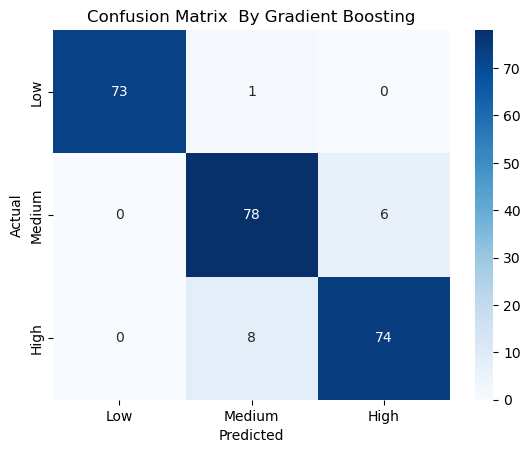

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_gb)
labels = ['Low', 'Medium', 'High']

sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix  By Gradient Boosting')
plt.show()

In [ ]:
##Most Affecting Feature

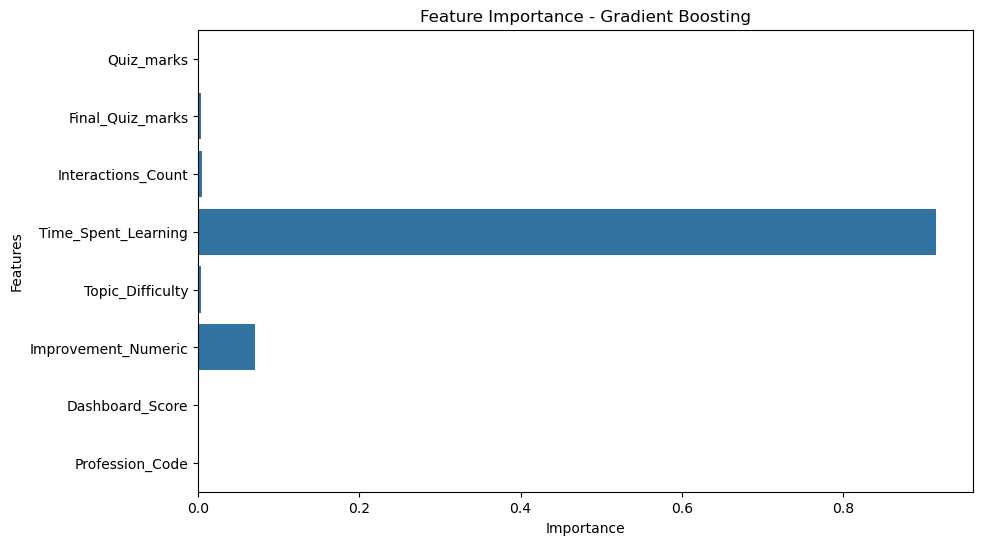

In [38]:
importances = model_gb.feature_importances_
feature_names = x.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance - Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()